In [191]:
# Temprorary fix for https://github.com/IRkernel/IRkernel/issues/145 https://github.com/jupyter/nbviewer/issues/453
options(jupyter.plot_mimetypes = 'image/png')

# Feature value-concept type box plots

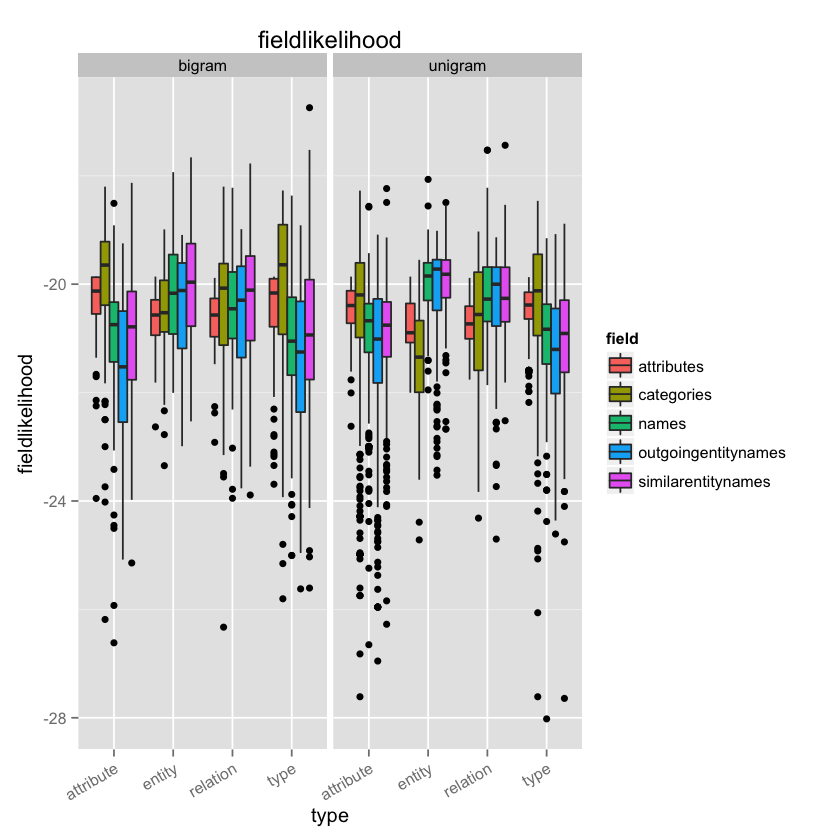

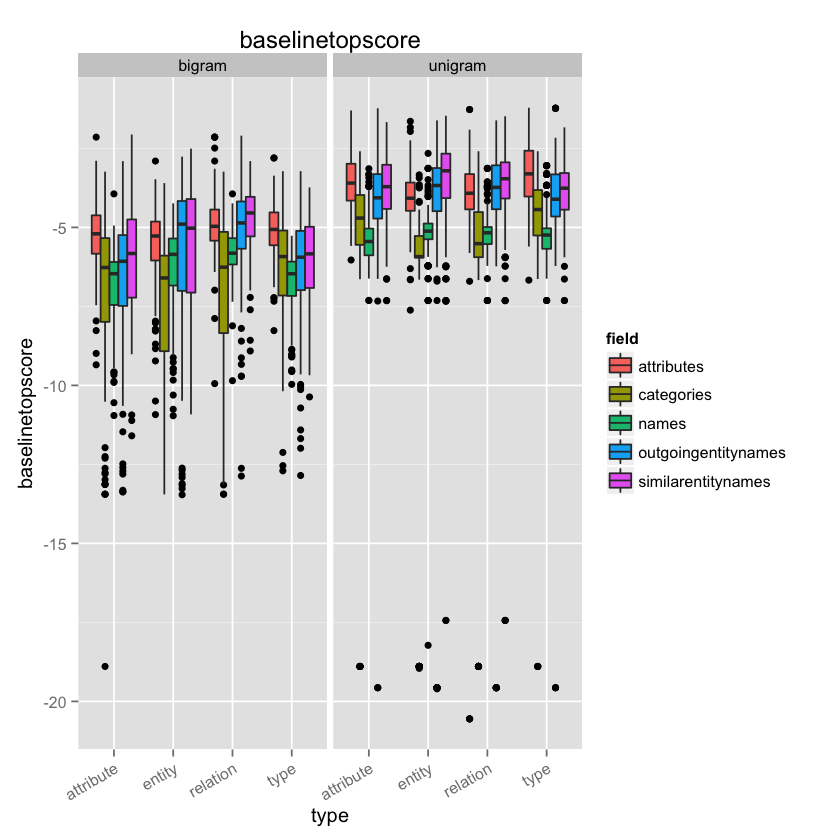

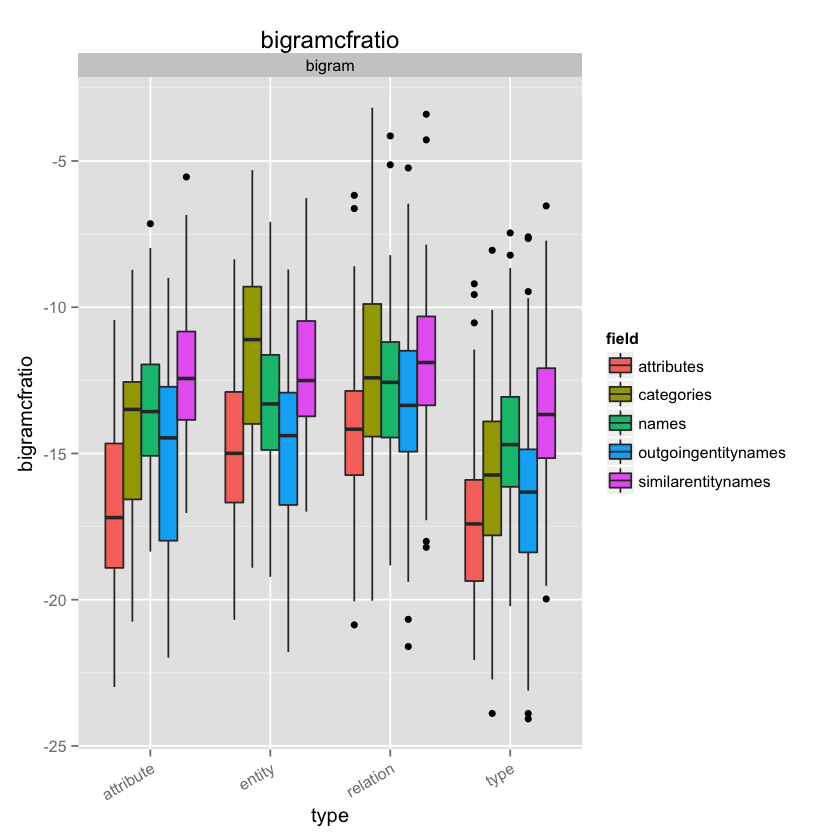

In [205]:
library(tidyr)
library(dplyr)
library(ggplot2)
runtime.features <- read.table("..//output//features_values.tsv", header = TRUE, sep = "\t") # edu.wayne.pfsdm.auxiliary.FeatureValuesTable
is.na(runtime.features) <- sapply(runtime.features, is.infinite)
runtime.features <- unique(runtime.features)
runtime.features.wide <- spread(runtime.features, featurename, featurevalue)
concept.types <- read.table("..//data//sigir2013-dbpedia//concept-types.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "type", "text"))
# concept.types$concept.id <- 1:(nrow(concept.types))
# runtime.features.wide$concept.id <- rep(1:(nrow(runtime.features.wide)/5), each=5)
merged <- merge(runtime.features.wide, concept.types, by = c("qid", "gram"))
filtered <- filter(merged, type != "", type != "unsure", type != "none")
features <- c("fieldlikelihood", "baselinetopscore", "bigramcfratio")
for (feature in features) {
  print(ggplot(na.omit(filtered[,c(feature, "field", "type", "ngramtype")]), aes_string(y = feature, x = "type", fill = "field")) +
        geom_boxplot() + facet_wrap(~ngramtype) + theme(axis.text.x=element_text(angle=30,hjust=1)) +
        ggtitle(feature))
}

# Contingency tables for binary features
These features don't depend on field.

## NNP(S) feature

In [193]:
nnp <- read.table("..//src//main//resources//file-based-features//nnp.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(nnp$value, concept.types$type)) %>% select(-none, -unsure)

,attribute,entity,relation,type
0,459,210,98,492
1,97,88,266,36


## NNS feature

In [194]:
nns <- read.table("..//src//main//resources//file-based-features//nns.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(nns$value, concept.types$type)) %>% select(-none, -unsure)

,attribute,entity,relation,type
0,522,276,346,230
1,34,22,18,298


## NP-exact feature

In [195]:
np.exact <- read.table("..//src//main//resources//file-based-features//np-exact.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(np.exact$value, concept.types$type)) %>% select(-none, -unsure)

,attribute,entity,relation,type
0,543,235,325,479
1,13,63,39,49


## NP-part feature

In [196]:
np.part <- read.table("..//src//main//resources//file-based-features//np-part.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(np.part$value, concept.types$type)) %>% select(-none, -unsure)

,attribute,entity,relation,type
0,457,211,262,407
1,99,87,102,121


# Field CF for terms with different feature values

In [197]:
cf <- read.table("..//output//cf.tsv", header = TRUE, sep = "\t") # edu.wayne.pfsdm.auxiliary.FeatureValuesTable
is.na(cf) <- sapply(cf, is.infinite)
cf <- unique(cf)
cf.wide <- spread(cf, featurename, featurevalue)

merged.cf <- merge(cf.wide, concept.types, by = c("qid", "gram"))
filtered.cf <- filter(merged.cf, type != "", type != "unsure", type != "none")

## NNP(S) feature

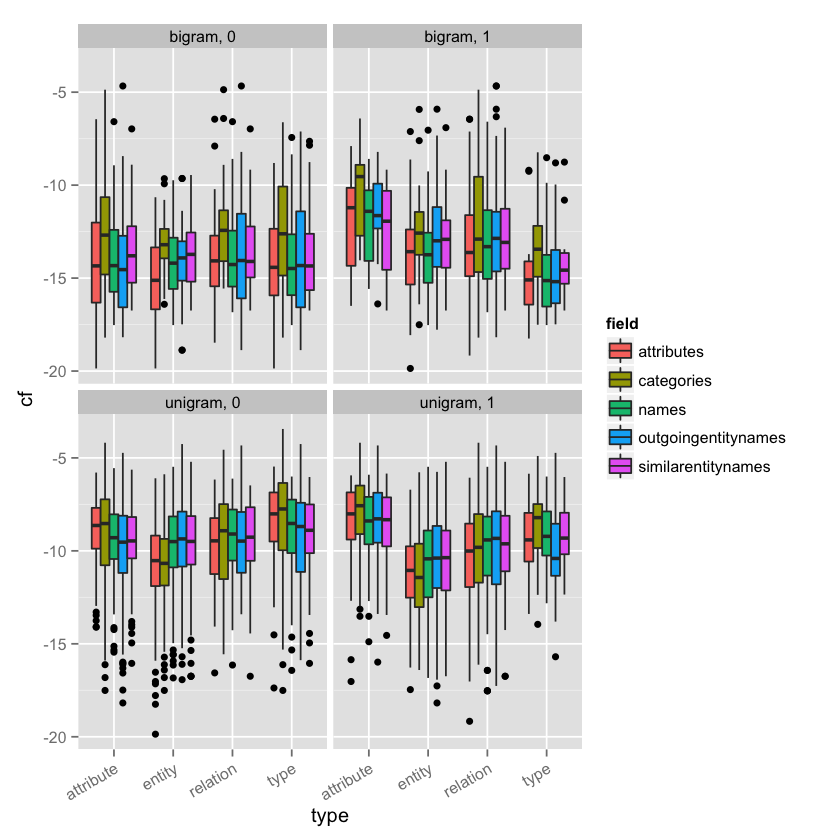

In [198]:
merged.nnp <- merge(filtered.cf, nnp)
ggplot(na.omit(merged.nnp[,c("cf", "field", "type", "ngramtype", "value")]), aes(y = cf, x = type, fill = field)) +
  geom_boxplot() + facet_wrap(~ngramtype+value) + theme(axis.text.x=element_text(angle=30,hjust=1))

## NNS feature

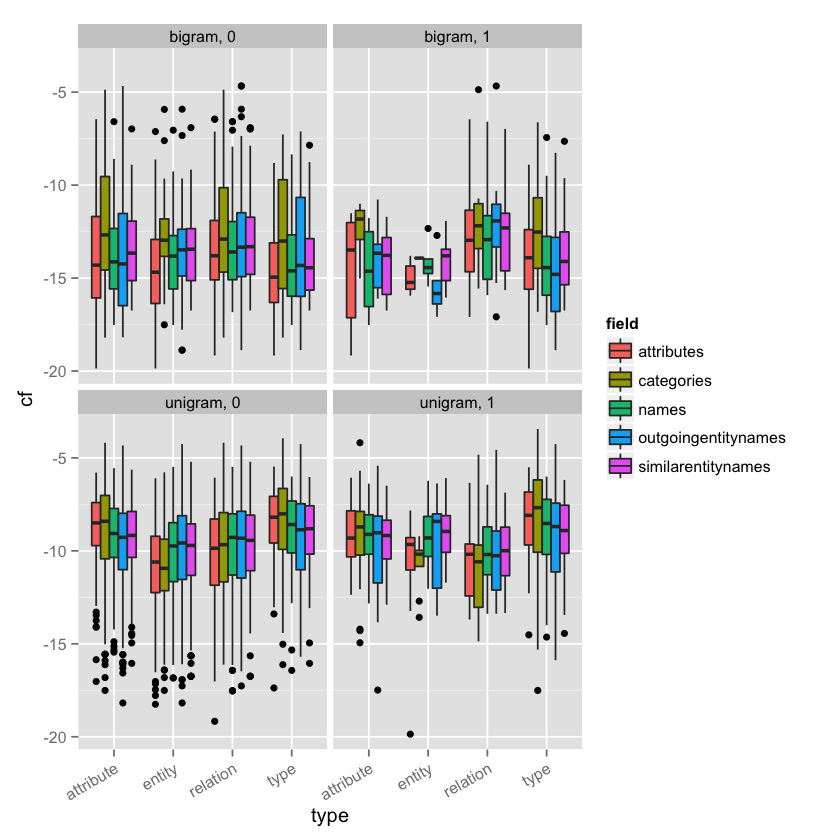

In [199]:
merged.nns <- merge(filtered.cf, nns)
ggplot(na.omit(merged.nns[,c("cf", "field", "type", "ngramtype", "value")]), aes(y = cf, x = type, fill = field)) +
  geom_boxplot() + facet_wrap(~ngramtype+value) + theme(axis.text.x=element_text(angle=30,hjust=1))

## NP-exact feature

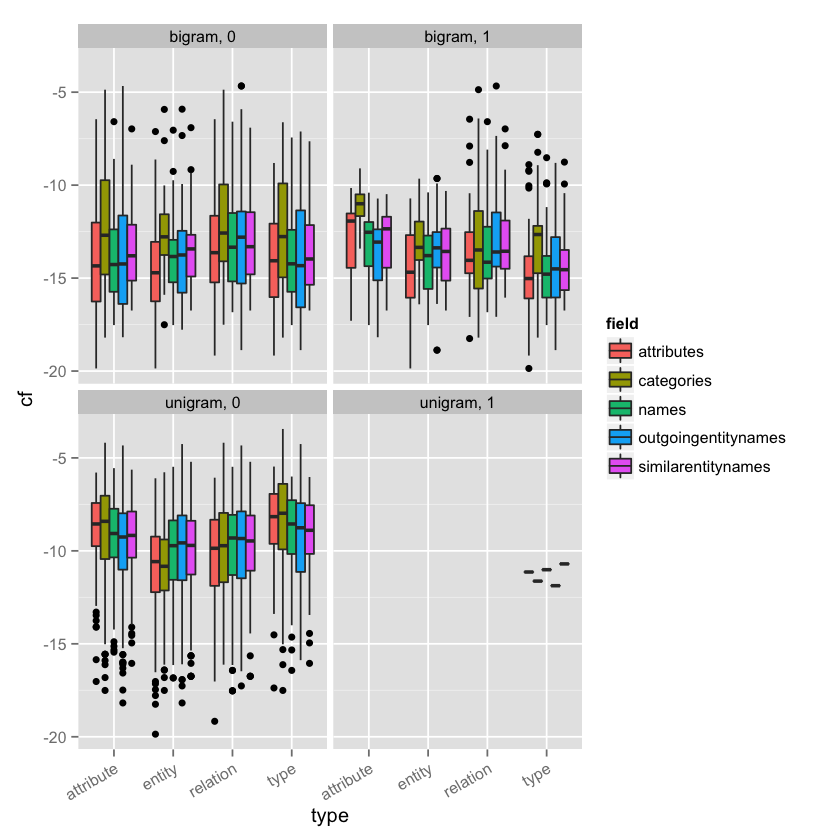

In [200]:
merged.np.exact <- merge(filtered.cf, np.exact)
ggplot(na.omit(merged.np.exact[,c("cf", "field", "type", "ngramtype", "value")]), aes(y = cf, x = type, fill = field)) +
  geom_boxplot() + facet_wrap(~ngramtype+value) + theme(axis.text.x=element_text(angle=30,hjust=1))

## NP-part feature

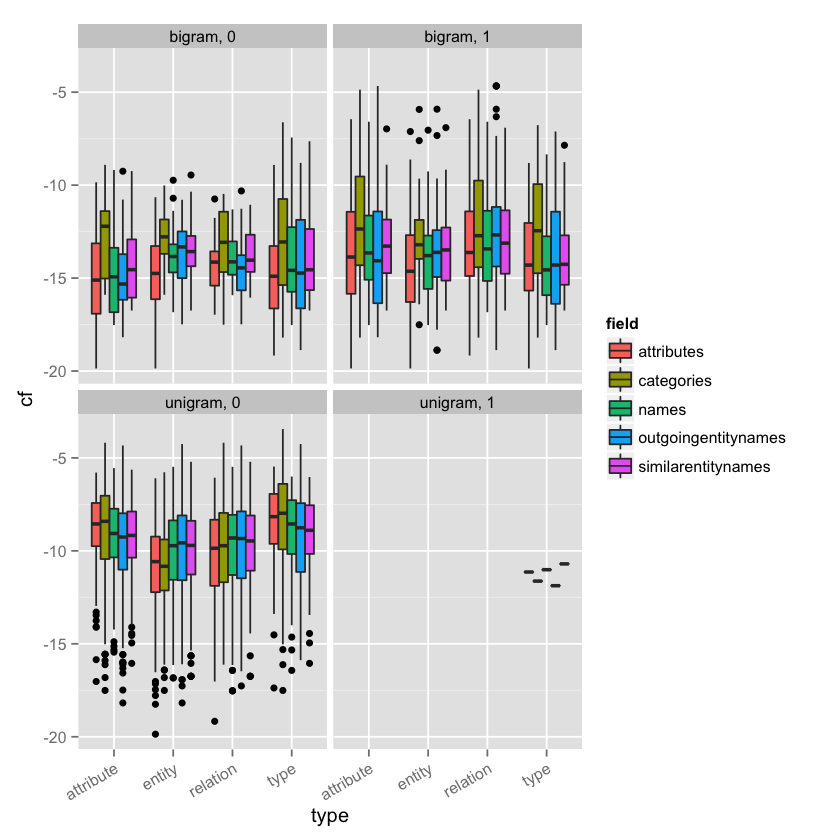

In [201]:
merged.np.part <- merge(filtered.cf, np.part)
ggplot(na.omit(merged.np.part[,c("cf", "field", "type", "ngramtype", "value")]), aes(y = cf, x = type, fill = field)) +
  geom_boxplot() + facet_wrap(~ngramtype+value) + theme(axis.text.x=element_text(angle=30,hjust=1))

# Performance comparison
Performance of PFSDM using features BaselineTopScore and FieldLikelihood compared to PRMS and SDM-CA baselines.

Obtained using:
```bash
galago eval eval.json --runs+<baseline.run> --runs+<pfsdm.run>
eval.json contents:
{"metrics": ["map","P10","P20","bpref"],
"judgments": "dbpedia-3.7.rel"}
```

## SemSearch_ES
|          | MAP           | P@10          | P@20          | b-pref        |
| -------- | ------------- | ------------- | ------------- | ------------- |
| PRMS \*  | 0.230         | 0.177         | 0.125         | 0.569         |
| SDM \*\* | 0.254         | 0.202         | 0.149         | 0.671         |
| PFSDM    | 0.385 \* \*\* | 0.292 \* \*\* | 0.204 \* \*\* | 0.736 \* \*\* |

## ListSearch
|          | MAP           | P@10          | P@20          | b-pref        |
| -------- | ------------- | ------------- | ------------- | ------------- |
| PRMS \*  | 0.111         | 0.154         | 0.121         | 0.310         |
| SDM \*\* | 0.197         | 0.252         | 0.202         | 0.471         |
| PFSDM     | 0.206 \*      | 0.270 \*      | 0.210 \*      | 0.452 \*      |

## INEX_LD
|          | MAP           | P@10          | P@20          | b-pref        |
| -------- | ------------- | ------------- | ------------- | ------------- |
| PRMS \*  | 0.064         | 0.145         | 0.123         | 0.216         |
| SDM \*\* | 0.117         | 0.258         | 0.199         | 0.335         |
| PFSDM     | 0.106 \*      | 0.244 \*      | 0.198 \*      | 0.318 \*      |

## QALD2
|          | MAP           | P@10          | P@20          | b-pref        |
| -------- | ------------- | ------------- | ------------- | ------------- |
| PRMS \*  | 0.120         | 0.079         | 0.067         | 0.328         |
| SDM \*\* | 0.184         | 0.106         | 0.090         | 0.465         |
| PFSDM     | 0.215 \* \*\* | 0.129 \*      | 0.106 \*      | 0.439 \*      |

## All queries
|          | MAP           | P@10          | P@20          | b-pref        |
| -------- | ------------- | ------------- | ------------- | ------------- |
| PRMS \*  | 0.136         | 0.136         | 0.107         | 0.365         |
| SDM \*\* | 0.192         | 0.198         | 0.155         | 0.495         |
| PFSDM     | 0.236 \* \*\* | 0.230 \* \*\* | 0.176 \* \*\* | 0.497 \*      |

   # Topic-level difference between PFSDM and FSDM

TLD files obtained using
```bash
galago eval --details=true --judgments=dbpedia-3.7.rel --metrics+map --runs+<baseline.run> --runs+ <pfsdm.run> |grep "^[^ ]\+ \+[^ ]\+ \+[^ ]\+ \$"
```

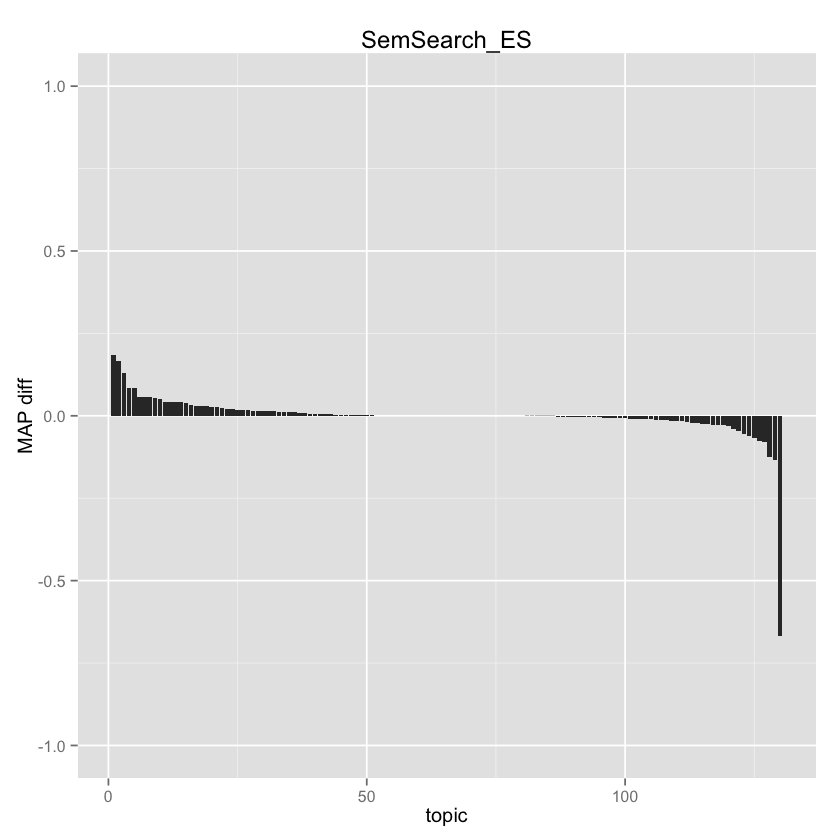

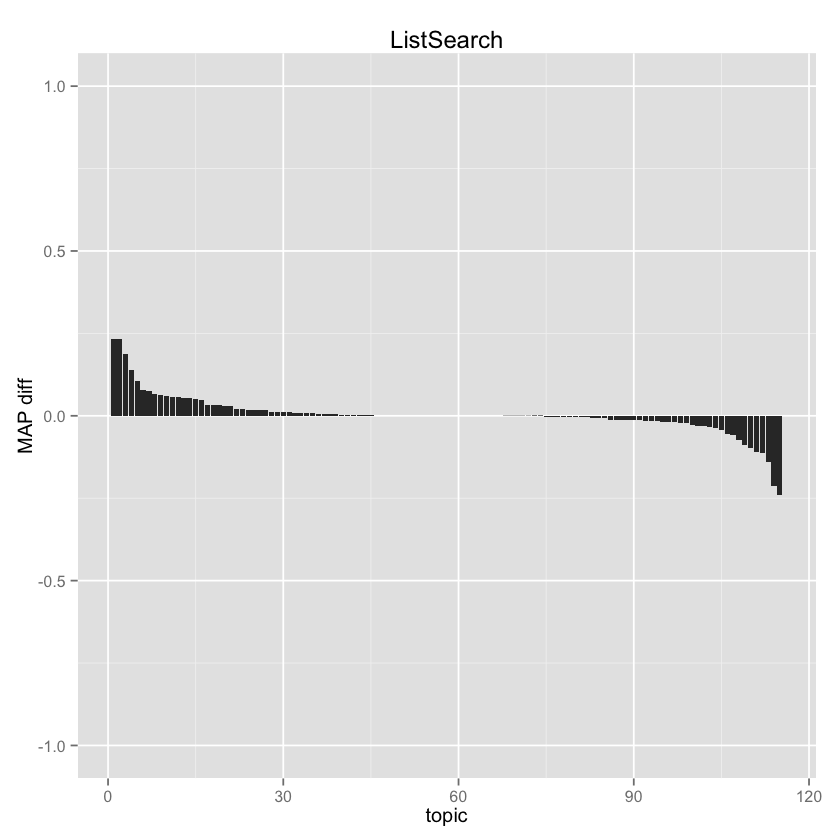

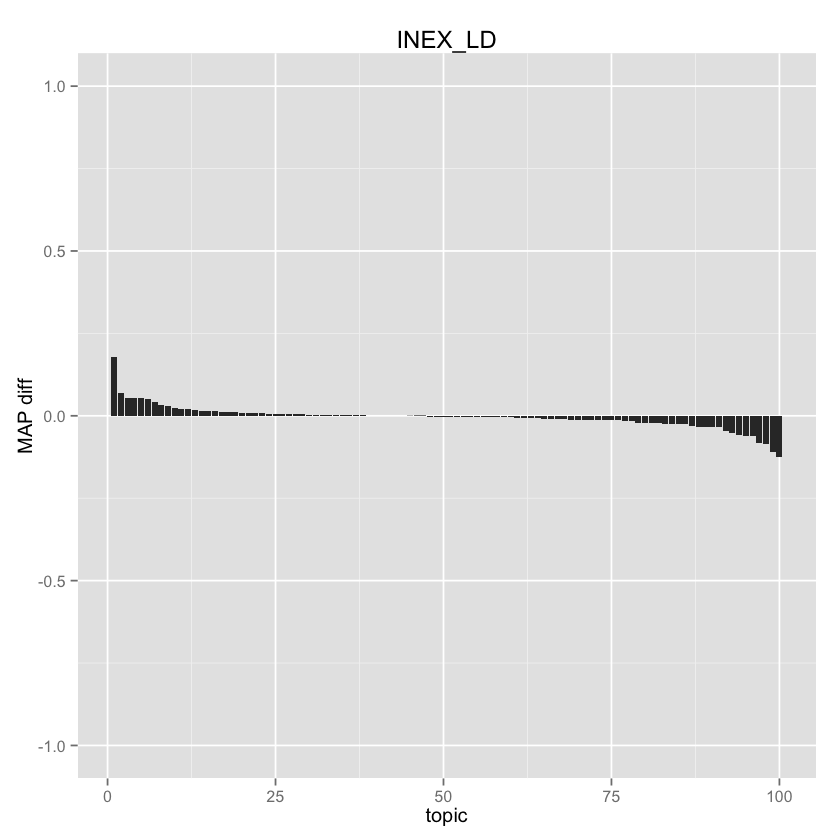

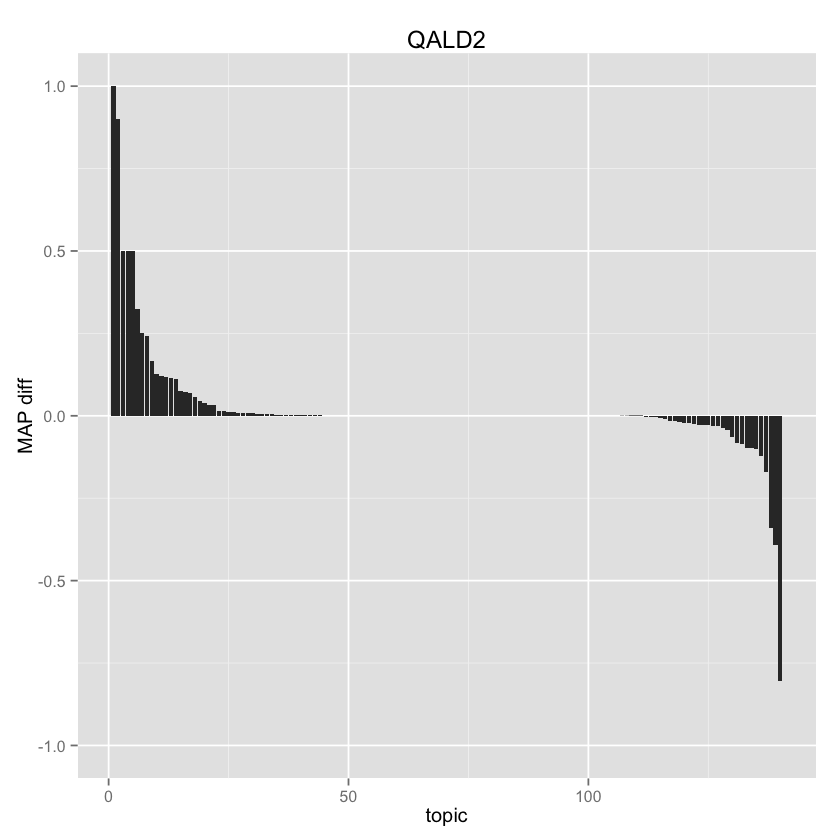

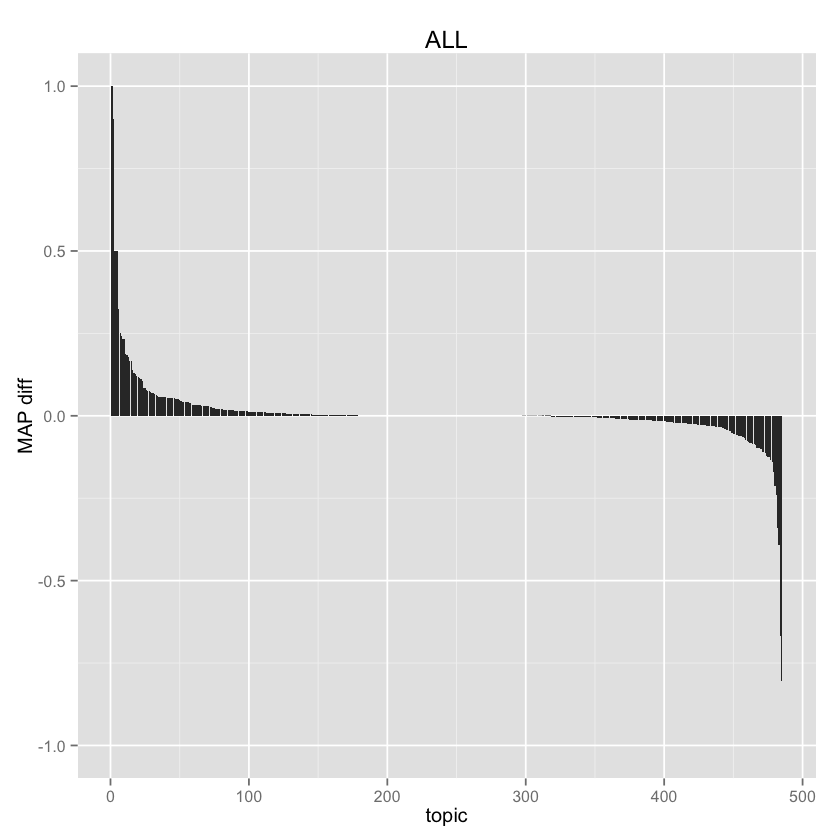

In [202]:
for (col in c("SemSearch_ES", "ListSearch", "INEX_LD", "QALD2", "ALL")) {
    tld <- read.table(file.path("tld", col), header = TRUE, col.names = c("qid","fsdm","pfsdm"))
    diff <- tld$pfsdm - tld$fsdm
    
    suppressWarnings(print(
        qplot(1:length(diff), sort(diff, decreasing=TRUE), ylab="MAP diff", xlab="topic",
              geom="histogram", stat="identity", ylim=c(-1, 1), main=col)
        ))
}

## Most improved queries for QALD2

In [203]:
tld <- read.table(file.path("tld", "QALD2"), header = TRUE, col.names = c("qid","fsdm","pfsdm"))
queries <- read.table("../data/sigir2013-dbpedia/queries.txt", header = FALSE, sep = "\t", quote = "", , col.names = c("qid", "text"))
tld <- merge(tld, queries)
tld$diff <- tld$pfsdm - tld$fsdm
tld <- tld %>% select(qid, text, diff)
head(tld %>% arrange(-diff))

,qid,text,diff
1,QALD2_tr-13,Which classis does the Millepede belong to?,1
2,QALD2_tr-86,Give me all female German chancellors.,0.9
3,QALD2_te-22,Who is the governor of Texas?,0.5
4,QALD2_tr-65,Which companies work in the aerospace industry as well as on nuclear reactor technology?,0.5
5,QALD2_tr-75,Who has been the 5th president of the United States of America?,0.5
6,QALD2_te-39,Give me all companies in Munich.,0.323


## Most degraded queries for QALD2

In [204]:
head(tld %>% arrange(diff))

,qid,text,diff
1,QALD2_te-40,List all boardgames by GMT.,-0.803
2,QALD2_tr-89,Give me all soccer clubs in the Premier League.,-0.392
3,QALD2_te-19,Give me all people that were born in Vienna and died in Berlin.,-0.341
4,QALD2_tr-79,"Which airports are located in California, USA?",-0.17
5,QALD2_te-1,Which German cities have more than 250000 inhabitants?,-0.122
6,QALD2_tr-42,What are the official languages of the Philippines?,-0.1


# Parameterizing lambdas in the PFSDM model

\begin{equation*}
P_{\Lambda}(D | Q) \stackrel{rank}{=} \lambda(q_i) \sum_{q \in Q} \tilde{f}_T(q_i, D)~+ \nonumber
 \lambda(q_i, q_{i+1}) \sum_{q_i,q_{i+1} \in Q} \tilde{f}_O(q_i, q_{i+1}, D)~+ \nonumber
 \lambda(q_i, q_{i+1}) \sum_{q_i,q_{i+1} \in Q} \tilde{f}_U(q_i, q_{i+1}, D)
\end{equation*}

\begin{equation*}
\tilde{f}_T(q_i, D) = \log w^T_j P(q_i | \theta^j_D) = \log \sum_j w_j \frac{tf_{q_i,D_j} + \mu_j\frac{cf_{q_i}}{|C_j|}}{|D^j| + \mu_j}
\end{equation*}

\begin{equation*}
w_j = \sum_k \alpha^t_{j k} \phi_k(q_i, j),
\end{equation*}

\begin{equation*}
\sum_j w_j = 1, w_j \geq 0, \alpha^t_{j k} \geq 0, 0 \leq \phi^t_k(q_i, j) \leq 1
\end{equation*}

\begin{equation*}
\lambda(q_i) = \sum^{k_u}_{j=1}w^u_j g^u_j(q_i)
\end{equation*}
\begin{equation*}
\lambda(q_i, q_{i+1}) = \sum^{k_b}_{j=1}w^b_j g^b_j(q_i, q_{i+1})
\end{equation*}
\begin{equation*}
\sum_j^{k_u} w^u_j + \sum_{j}^{k_b} w^b_j = 1, w^{u,b}_j \geq 0
\end{equation*}